In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [3]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

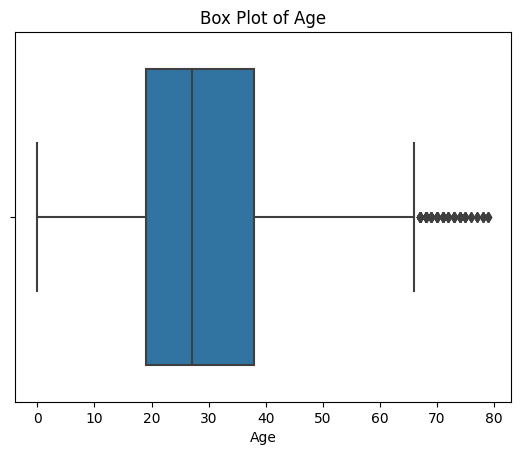

In [7]:
sns.boxplot(x='Age', data=train)
plt.title('Box Plot of Age')
plt.show()

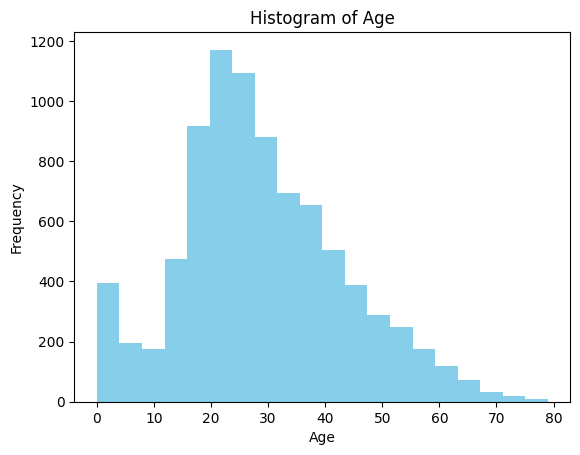

In [8]:
plt.hist(train['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

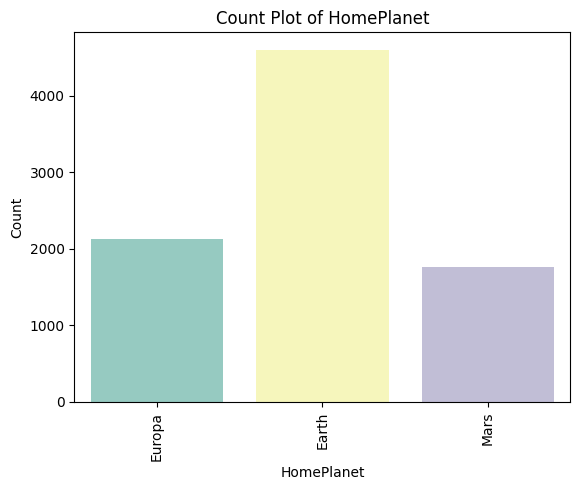

In [9]:
sns.countplot(x='HomePlanet', data=train, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Count Plot of HomePlanet')
plt.show()

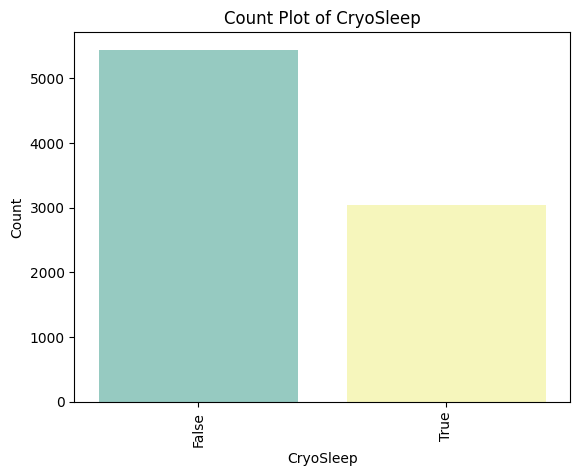

In [10]:
sns.countplot(x='CryoSleep', data=train, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Count Plot of CryoSleep')
plt.show()

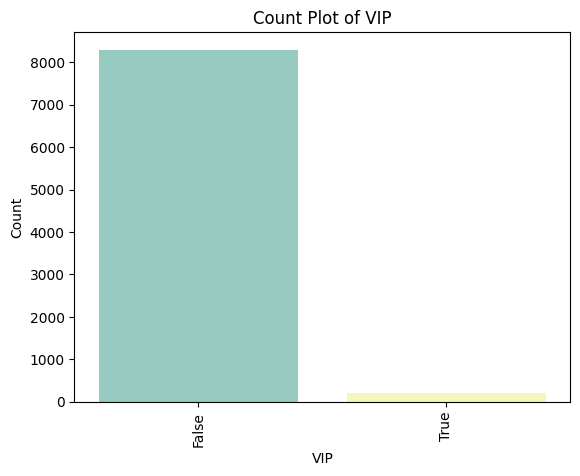

In [11]:
sns.countplot(x='VIP', data=train, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Count Plot of VIP')
plt.show()

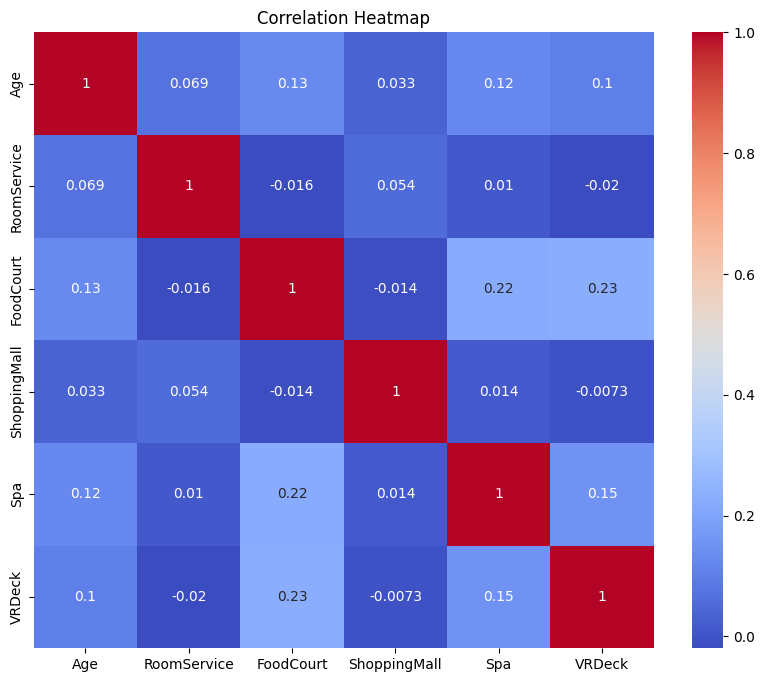

In [12]:

# Encode categorical columns (example using one-hot encoding for 'HomePlanet')
train_encoded = pd.get_dummies(train, columns=['HomePlanet'], drop_first=True)

# Exclude non-numeric columns and 'Transported' if needed
numerical_columns = train_encoded.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_encoded[numerical_columns].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


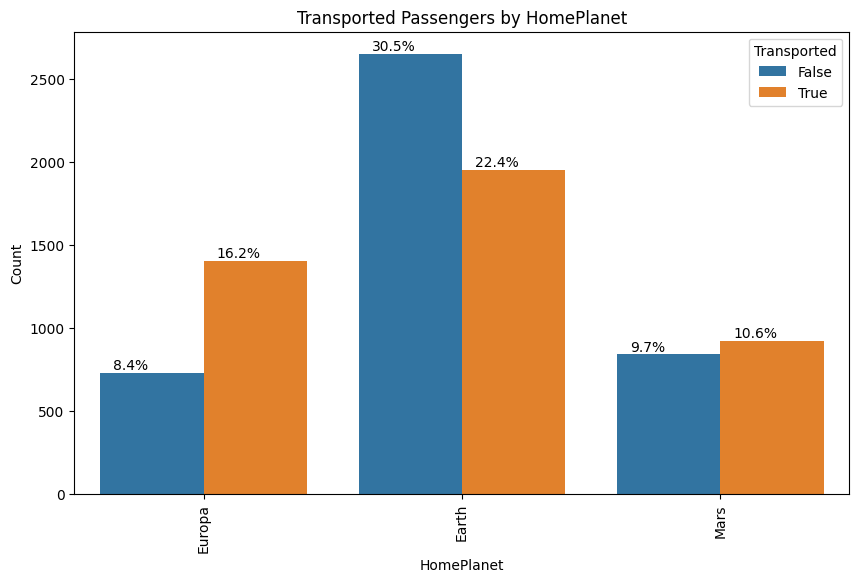

In [13]:

# Create a count plot for 'HomePlanet' vs. 'Transported' with percentage annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='HomePlanet', hue='Transported', data=train)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Transported Passengers by HomePlanet')
plt.legend(title='Transported', labels=['False', 'True'])

# Add percentage annotations to the bars
total_height = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y))

plt.show()

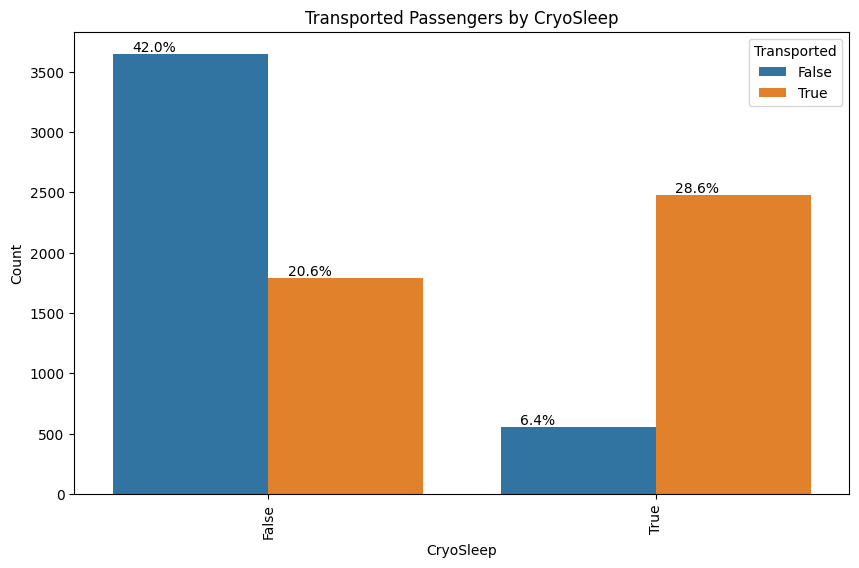

In [14]:

# Create a count plot for 'CryoSleep' vs. 'Transported' with percentage annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CryoSleep', hue='Transported', data=train)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Transported Passengers by CryoSleep')
plt.legend(title='Transported', labels=['False', 'True'])

# Add percentage annotations to the bars
total_height = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y))

plt.show()

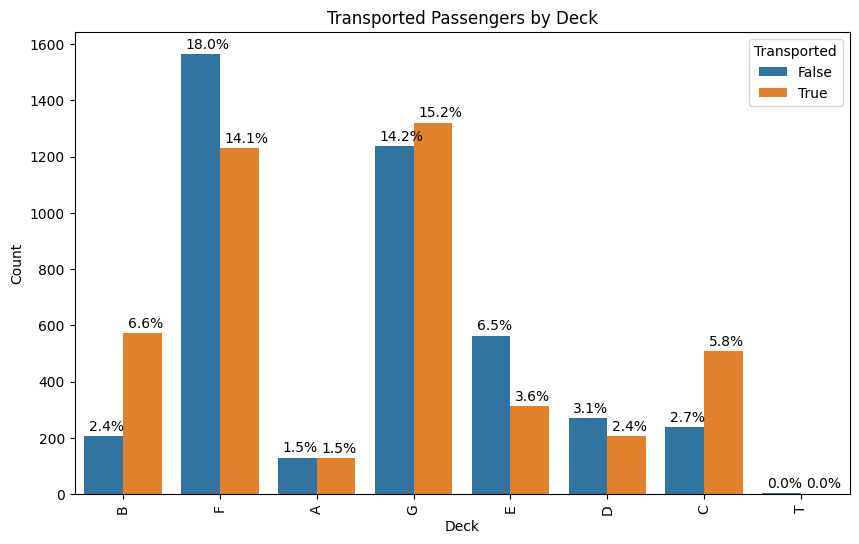

In [15]:

# Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

# Create a count plot for 'Deck' vs. 'Transported' with percentage annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Deck', hue='Transported', data=train)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Transported Passengers by Deck')
plt.legend(title='Transported', labels=['False', 'True'])

# Add percentage annotations to the bars
total_height = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y))

plt.show()

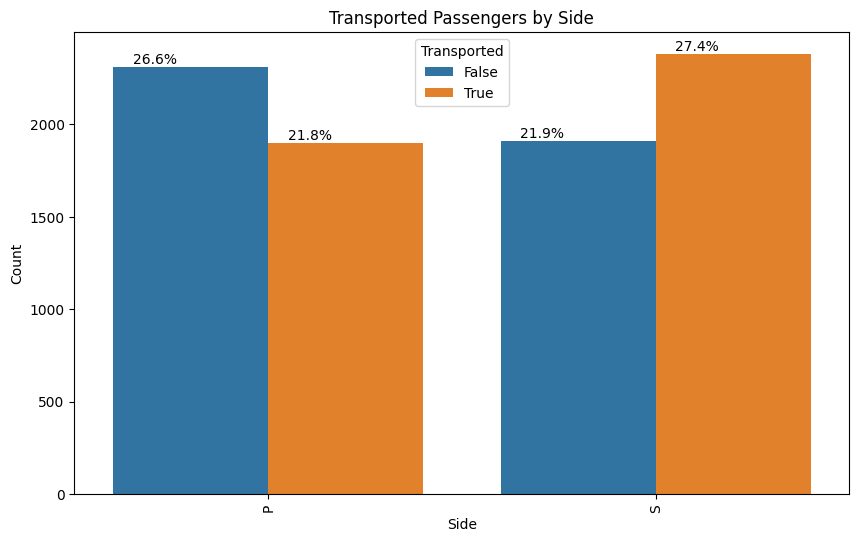

In [16]:

# Split the 'Cabin' column into 'Deck', 'Num', and 'Side'
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

# Create a count plot for 'Deck' vs. 'Transported' with percentage annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Side', hue='Transported', data=train)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Side')
plt.ylabel('Count')
plt.title('Transported Passengers by Side')
plt.legend(title='Transported', labels=['False', 'True'])

# Add percentage annotations to the bars
total_height = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y))

plt.show()

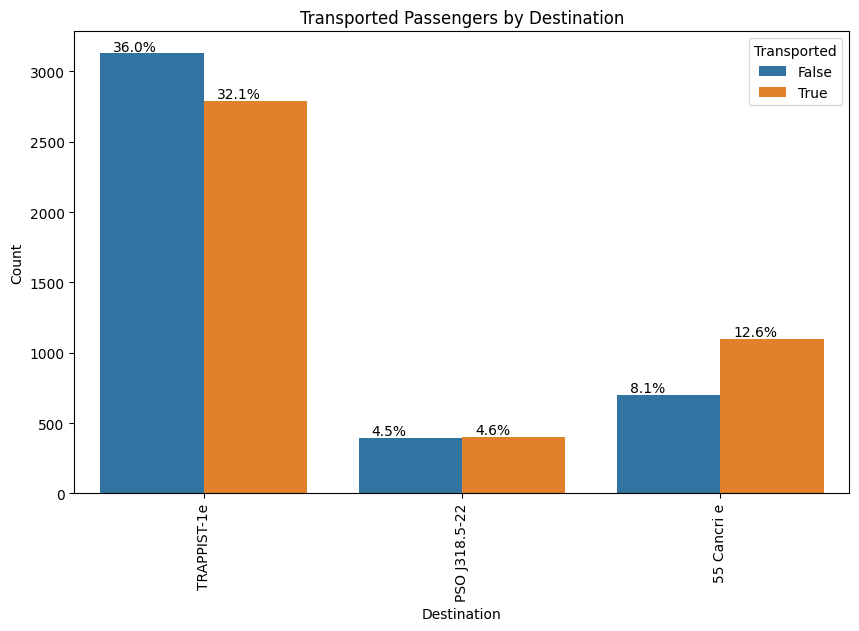

In [17]:

# Create a count plot for 'Destination' vs. 'Transported' with percentage annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Destination', hue='Transported', data=train)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Transported Passengers by Destination')
plt.legend(title='Transported', labels=['False', 'True'])

# Add percentage annotations to the bars
total_height = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y))

plt.show()

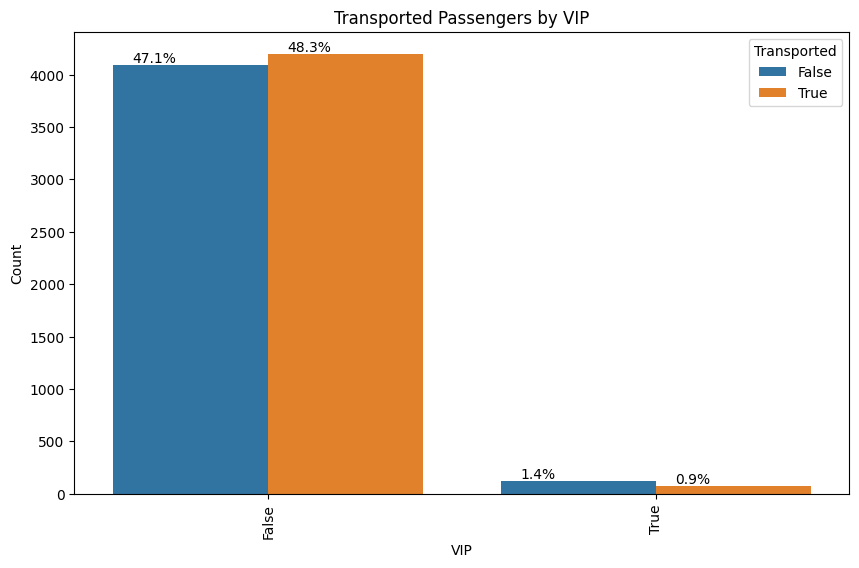

In [18]:

# Create a count plot for 'VIP' vs. 'Transported' with percentage annotations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='VIP', hue='Transported', data=train)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Transported Passengers by VIP')
plt.legend(title='Transported', labels=['False', 'True'])

# Add percentage annotations to the bars
total_height = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y))

plt.show()

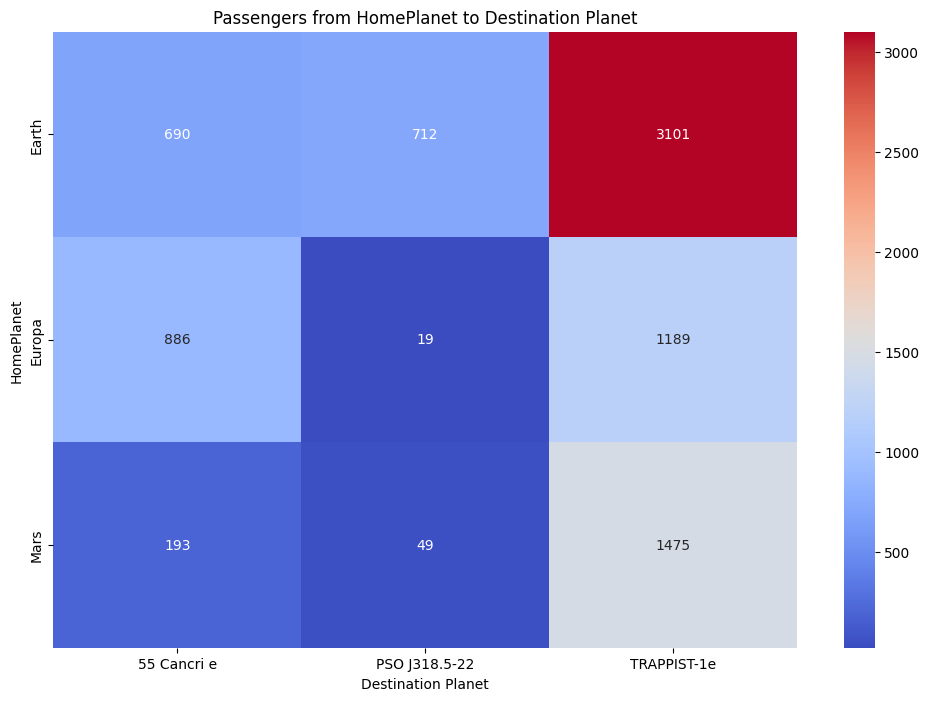

In [19]:
# Create a pivot table to count passengers from each HomePlanet to each Destination
heatmap_data = train.pivot_table(index='HomePlanet', columns='Destination', values='Transported', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Destination Planet')
plt.ylabel('HomePlanet')
plt.title('Passengers from HomePlanet to Destination Planet')
plt.show()


In [20]:
# Split 'PassengerId' into 'Group' and 'NoOfPassengers' columns
train[['Group', 'NoOfPassengers']] = train['PassengerId'].str.split('_', expand=True)

In [21]:
# Split 'PassengerId' into 'Group' and 'NoOfPassengers' columns
test[['Group', 'NoOfPassengers']] = test['PassengerId'].str.split('_', expand=True)

In [22]:
top_10_groups = train['Group'].value_counts().head(10).reset_index()
top_10_groups.columns = ['Group', 'NoOfPassengers']

# Get cabin numbers for passengers in the top 10 groups
top_10_groups['CabinNumbers'] = top_10_groups['Group'].apply(lambda group: train[train['Group'] == group]['Cabin'].unique())

print(top_10_groups)

  Group  NoOfPassengers               CabinNumbers
0  4498               8                  [G/734/S]
1  8168               8       [F/1561/S, G/1316/S]
2  8728               8  [F/1798/P, G/1416/P, nan]
3  8796               8       [G/1418/S, F/1704/S]
4  8956               8       [F/1838/P, G/1453/P]
5  4256               8         [F/880/P, G/698/P]
6  0984               8         [G/150/S, F/182/S]
7  9081               8  [G/1476/P, F/1858/P, nan]
8  8988               8       [G/1448/S, F/1741/S]
9  5756               8            [F/1194/P, nan]


In [23]:
# # Filter rows with NaN cabin numbers
# nan_cabin_groups = train[train['Cabin'].isna()]

# # Find the number of passengers in each group
# nan_cabin_groups = nan_cabin_groups['Group'].value_counts().reset_index()
# nan_cabin_groups.columns = ['Group', 'NoOfPassengers']

# # Initialize an empty list to store cabin numbers
# cabin_numbers = []

# # Iterate through each group to find unique cabin numbers
# for group in nan_cabin_groups['Group']:
#     cabin_numbers_group = train[train['Group'] == group]['Cabin'].unique()
#     # Convert cabin numbers to strings and join them
#     cabin_numbers.append(', '.join(map(str, cabin_numbers_group)))

# # Add the cabin numbers to the DataFrame
# nan_cabin_groups['CabinNumbers'] = cabin_numbers

# print(nan_cabin_groups)


In [24]:
group_details = train[train['Group'] == '8728'][['PassengerId', 'Cabin']]
print(group_details)

     PassengerId     Cabin
8162     8728_01  F/1798/P
8163     8728_02  G/1416/P
8164     8728_03  F/1798/P
8165     8728_04  F/1798/P
8166     8728_05  G/1416/P
8167     8728_06  G/1416/P
8168     8728_07       NaN
8169     8728_08  G/1416/P


In [29]:
# Split the 'Cabin' column into 'Deck', 'Num', and 'Side' columns
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

# Display the updated DataFrame with the new columns
print(train.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported Deck Num Side Group NoOfPassengers  
0        False    B   0    P  0001             01  


In [30]:
# Split the 'Cabin' column into 'Deck', 'Num', and 'Side' columns
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split('/', expand=True)

# Display the updated DataFrame with the new columns
print(test.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez   

  Group NoOfPassengers Deck Num Side  
0  0013             01    G   3    S  
1  0018             01    F   4 

In [31]:
train.isna().sum()

PassengerId         0
HomePlanet        201
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
dtype: int64

In [32]:
# Select rows where 'HomePlanet' column has NaN values
nan_homeplanet_rows = train[train['HomePlanet'].isna()]

# Display these rows in a DataFrame
nan_homeplanet_df = pd.DataFrame(nan_homeplanet_rows)

# Print the DataFrame
print(nan_homeplanet_df)

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
59       0064_02        NaN      True     E/3/S  TRAPPIST-1e  33.0  False   
113      0119_01        NaN     False     A/0/P  TRAPPIST-1e  39.0  False   
186      0210_01        NaN      True     D/6/P  55 Cancri e  24.0  False   
225      0242_01        NaN     False    F/46/S  TRAPPIST-1e  18.0  False   
234      0251_01        NaN      True    C/11/S  55 Cancri e  54.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
8515     9084_01        NaN     False   E/582/P  TRAPPIST-1e  25.0  False   
8613     9194_01        NaN     False   E/603/S  55 Cancri e  53.0  False   
8666     9248_01        NaN     False  F/1792/S  55 Cancri e  38.0    NaN   
8674     9257_01        NaN     False  F/1892/P  TRAPPIST-1e  13.0  False   
8684     9274_01        NaN      True  G/1508/P  TRAPPIST-1e  23.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name 

In [33]:
# Select rows where 'HomePlanet' column has NaN values
nan_homeplanet_rows = test[test['HomePlanet'].isna()]

# Display these rows in a DataFrame
nan_homeplanet_df = pd.DataFrame(nan_homeplanet_rows)

# Print the DataFrame
print(nan_homeplanet_df)

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
276      0616_01        NaN     False    E/40/S  TRAPPIST-1e  31.0  False   
340      0730_01        NaN     False   F/135/S  TRAPPIST-1e  44.0  False   
450      0936_01        NaN     False   F/171/S  TRAPPIST-1e  20.0  False   
464      0967_01        NaN     False   F/180/S  TRAPPIST-1e  19.0  False   
481      1021_01        NaN     False   F/192/S  TRAPPIST-1e  23.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
3957     8621_01        NaN     False   E/552/P  TRAPPIST-1e  19.0  False   
3980     8678_01        NaN      True  G/1399/S  55 Cancri e   9.0  False   
4032     8775_01        NaN      True   D/275/P  TRAPPIST-1e  40.0  False   
4159     9025_01        NaN     False  G/1454/S  TRAPPIST-1e  42.0  False   
4213     9146_01        NaN     False  F/1874/P  TRAPPIST-1e  52.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Na

In [34]:

# Group the data by 'Destination' and find the mode 'HomePlanet' for each destination
destination_mode = train.groupby('Destination')['HomePlanet'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing 'HomePlanet' values based on 'Destination' mode
train['HomePlanet'] = train.apply(lambda row: destination_mode.get(row['Destination'], np.nan) if pd.isna(row['HomePlanet']) else row['HomePlanet'], axis=1)

# For passengers with nan values in both 'HomePlanet' and 'Destination', fill mode of 'HomePlanet'
nan_both_columns = train[train['HomePlanet'].isna() & train['Destination'].isna()]
train.loc[nan_both_columns.index, 'HomePlanet'] = nan_both_columns['Destination'].apply(lambda x: destination_mode.get(x, np.nan))

# Print rows with NaN values in 'HomePlanet' column after filling
nan_homeplanet_rows_after_fill = train[train['HomePlanet'].isna()]
print(nan_homeplanet_rows_after_fill)


     PassengerId HomePlanet CryoSleep     Cabin Destination   Age    VIP  \
347      0382_01        NaN     False    G/64/P         NaN  23.0  False   
5208     5555_01        NaN     False   G/896/S         NaN  43.0    NaN   
5687     6031_01        NaN     False  F/1146/S         NaN  52.0  False   
6629     6992_01        NaN     False  G/1131/P         NaN  12.0  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck                Name  \
347         348.0        0.0           0.0  4.0   368.0  Blanie Floydendley   
5208          1.0        0.0         213.0  7.0   701.0    Winia Blanglison   
5687          0.0      645.0           0.0  0.0   395.0    Bobara Alshipson   
6629          0.0        0.0           0.0  0.0     0.0   Walles Bakerrison   

      Transported Deck   Num Side Group NoOfPassengers  
347         False    G    64    P  0382             01  
5208         True    G   896    S  5555             01  
5687         True    F  1146    S  6031             

In [35]:

# Group the data by 'Destination' and find the mode 'HomePlanet' for each destination
destination_mode = test.groupby('Destination')['HomePlanet'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing 'HomePlanet' values based on 'Destination' mode
test['HomePlanet'] = test.apply(lambda row: destination_mode.get(row['Destination'], np.nan) if pd.isna(row['HomePlanet']) else row['HomePlanet'], axis=1)

# For passengers with nan values in both 'HomePlanet' and 'Destination', fill mode of 'HomePlanet'
nan_both_columns = test[test['HomePlanet'].isna() & test['Destination'].isna()]
test.loc[nan_both_columns.index, 'HomePlanet'] = nan_both_columns['Destination'].apply(lambda x: destination_mode.get(x, np.nan))

# Print rows with NaN values in 'HomePlanet' column after filling
nan_homeplanet_rows_after_fill = test[test['HomePlanet'].isna()]
print(nan_homeplanet_rows_after_fill)


     PassengerId HomePlanet CryoSleep    Cabin Destination   Age    VIP  \
1160     2430_03        NaN     False  G/394/S         NaN  19.0  False   
3183     6961_02        NaN     False  D/211/S         NaN  57.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck              Name  \
1160        785.0        0.0           0.0    0.0     0.0  Ronia Mcphernard   
3183          0.0     2847.0           0.0  101.0  9613.0  Ruchban Ciplanke   

     Group NoOfPassengers Deck  Num Side  
1160  2430             03    G  394    S  
3183  6961             02    D  211    S  


In [36]:
train.isna().sum()

PassengerId         0
HomePlanet          4
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
dtype: int64

In [37]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

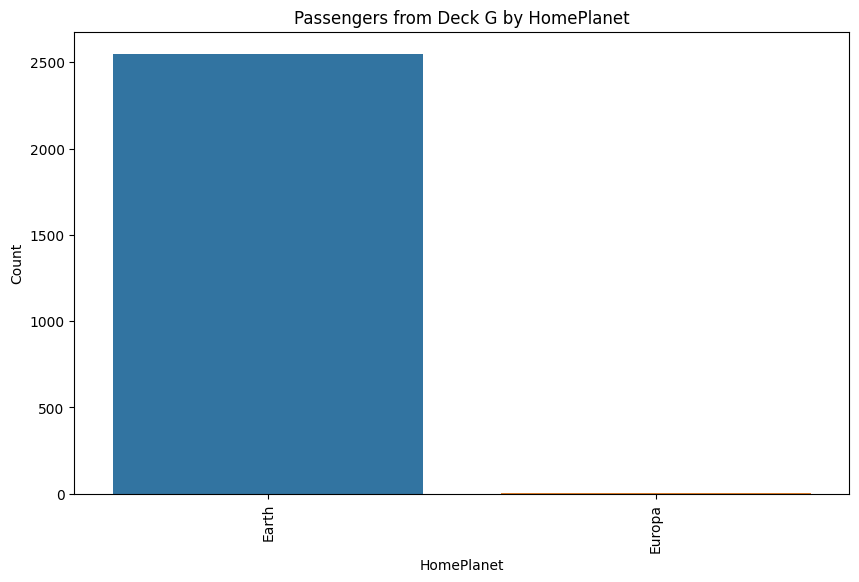

In [38]:

# Filter passengers from 'Deck' values 'G'
deck_gf_passengers = train[(train['Deck'] == 'G')]

# Create a count plot for 'HomePlanet' of passengers from 'Deck' values 'G' and 'F'
plt.figure(figsize=(10, 6))
sns.countplot(x='HomePlanet', data=deck_gf_passengers)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Passengers from Deck G by HomePlanet')
plt.show()


In [39]:
# Impute remaining NaN values in 'HomePlanet' with the mode of the entire column
mode_homeplanet = train['HomePlanet'].mode().iloc[0]
train['HomePlanet'].fillna(mode_homeplanet, inplace=True)

# Verify if there are still any NaN values in 'HomePlanet'
nan_homeplanet_rows_after_fill = train[train['HomePlanet'].isna()]
print(nan_homeplanet_rows_after_fill)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, Deck, Num, Side, Group, NoOfPassengers]
Index: []


In [40]:
# Impute remaining NaN values in 'HomePlanet' with the mode of the entire column
mode_homeplanet = test['HomePlanet'].mode().iloc[0]
test['HomePlanet'].fillna(mode_homeplanet, inplace=True)

# Verify if there are still any NaN values in 'HomePlanet'
nan_homeplanet_rows_after_fill = test[test['HomePlanet'].isna()]
print(nan_homeplanet_rows_after_fill)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Group, NoOfPassengers, Deck, Num, Side]
Index: []


In [41]:
train.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [42]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
dtype: int64

In [43]:
train['Leisure_Total'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [44]:
test['Leisure_Total'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [45]:
nan_cryosleep_rows = train[train['CryoSleep'].isna()]
print(nan_cryosleep_rows)

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
92       0099_02      Earth       NaN    G/12/P  TRAPPIST-1e   2.0  False   
98       0105_01      Earth       NaN    F/21/P  TRAPPIST-1e  27.0  False   
104      0110_02     Europa       NaN     B/5/P  TRAPPIST-1e  40.0  False   
111      0115_01       Mars       NaN    F/24/P  TRAPPIST-1e  26.0  False   
152      0173_01      Earth       NaN    E/11/S  TRAPPIST-1e  58.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
8620     9197_01     Europa       NaN   C/308/P  55 Cancri e  44.0  False   
8651     9227_05      Earth       NaN  G/1498/P  TRAPPIST-1e   8.0  False   
8664     9246_01      Earth       NaN  G/1490/S  TRAPPIST-1e  32.0  False   
8675     9259_01      Earth       NaN  F/1893/P  TRAPPIST-1e  44.0  False   
8687     9275_03     Europa       NaN    A/97/P  TRAPPIST-1e  30.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck              Name 

In [46]:
nan_cryosleep_rows = test[test['CryoSleep'].isna()]
print(nan_cryosleep_rows)

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
68       0156_01       Mars       NaN    F/34/P  TRAPPIST-1e   NaN  False   
78       0175_02      Earth       NaN    G/25/P  55 Cancri e   8.0  False   
92       0208_01      Earth       NaN    G/33/P  TRAPPIST-1e  40.0  False   
99       0227_01      Earth       NaN       NaN  TRAPPIST-1e  22.0  False   
165      0349_01     Europa       NaN     A/4/S  TRAPPIST-1e  33.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
3995     8705_01       Mars       NaN  F/1790/P  55 Cancri e  20.0  False   
4108     8925_06     Europa       NaN   C/295/P  TRAPPIST-1e  27.0  False   
4209     9138_01     Europa       NaN       NaN  TRAPPIST-1e  41.0  False   
4230     9182_01      Earth       NaN  F/1776/S  TRAPPIST-1e  14.0  False   
4239     9206_03     Europa       NaN   B/352/S  55 Cancri e  32.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
68           

In [47]:
# Fill NaN values in 'CryoSleep' based on 'Leisure_Total'
train['CryoSleep'] = train.apply(lambda row: True if row['Leisure_Total'] == 0 else False
                                 if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)

In [48]:
# Fill NaN values in 'CryoSleep' based on 'Leisure_Total'
test['CryoSleep'] = test.apply(lambda row: True if row['Leisure_Total'] == 0 else False
                                 if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)

In [49]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             199
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
Leisure_Total       0
dtype: int64

In [56]:
nan_destination_rows = train[train['Destination'].isna()]
print(nan_destination_rows)

     PassengerId HomePlanet  CryoSleep     Cabin Destination   Age    VIP  \
47       0045_02       Mars       True    F/10/P         NaN  19.0  False   
128      0138_02      Earth      False     E/5/P         NaN  34.0  False   
139      0152_01      Earth      False    F/32/P         NaN  41.0  False   
347      0382_01      Earth      False    G/64/P         NaN  23.0  False   
430      0462_01      Earth       True    G/67/S         NaN  50.0  False   
...          ...        ...        ...       ...         ...   ...    ...   
8372     8956_02      Earth       True  G/1453/P         NaN  20.0  False   
8551     9130_01       Mars       True  F/1765/S         NaN  41.0  False   
8616     9195_02       Mars       True  F/1779/S         NaN  33.0  False   
8621     9197_02     Europa      False   C/308/P         NaN  41.0   True   
8646     9226_01      Earth      False  F/1788/S         NaN  22.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
47           

In [57]:
nan_destination_rows = test[test['Destination'].isna()]
print(nan_destination_rows)

     PassengerId HomePlanet  CryoSleep     Cabin Destination   Age    VIP  \
127      0274_01       Mars      False    E/17/S         NaN  14.0  False   
198      0419_03      Earth       True    G/70/P         NaN  35.0  False   
242      0511_01      Earth      False    G/76/S         NaN  17.0  False   
253      0536_02       Mars      False    E/35/S         NaN  37.0  False   
277      0617_01       Mars      False   F/130/P         NaN  18.0  False   
...          ...        ...        ...       ...         ...   ...    ...   
4158     9022_03      Earth       True  F/1748/S         NaN   0.0  False   
4163     9039_01      Earth       True  G/1468/P         NaN  23.0  False   
4196     9095_01      Earth      False  G/1478/P         NaN  31.0  False   
4219     9155_01     Europa      False   C/304/P         NaN  17.0  False   
4275     9273_01     Europa      False   D/297/P         NaN   NaN  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name

In [58]:
# Group the data by 'Group' and 'HomePlanet' and find the mode 'Destination' for each group
group_homeplanet_mode = train.groupby(['Group', 'HomePlanet'])['Destination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing 'Destination' values based on 'Group' and 'HomePlanet' mode
train['Destination'] = train.apply(lambda row: group_homeplanet_mode.get((row['Group'], row['HomePlanet']), np.nan)
                                   if pd.isna(row['Destination']) else row['Destination'], axis=1)

In [59]:
# Group the data by 'Group' and 'HomePlanet' and find the mode 'Destination' for each group
group_homeplanet_mode = test.groupby(['Group', 'HomePlanet'])['Destination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing 'Destination' values based on 'Group' and 'HomePlanet' mode
test['Destination'] = test.apply(lambda row: group_homeplanet_mode.get((row['Group'], row['HomePlanet']), np.nan)
                                   if pd.isna(row['Destination']) else row['Destination'], axis=1)

In [60]:
nan_destination_rows = train[train['Destination'].isna()]
print(nan_destination_rows)

     PassengerId HomePlanet  CryoSleep     Cabin Destination   Age    VIP  \
139      0152_01      Earth      False    F/32/P         NaN  41.0  False   
347      0382_01      Earth      False    G/64/P         NaN  23.0  False   
430      0462_01      Earth       True    G/67/S         NaN  50.0  False   
547      0576_01      Earth      False   F/107/S         NaN  21.0  False   
620      0645_01      Earth      False    G/98/P         NaN  20.0  False   
...          ...        ...        ...       ...         ...   ...    ...   
8085     8640_01      Earth      False  F/1666/S         NaN  50.0  False   
8122     8673_01     Europa       True   C/285/P         NaN  27.0  False   
8195     8760_01      Earth      False  F/1696/S         NaN  22.0  False   
8551     9130_01       Mars       True  F/1765/S         NaN  41.0  False   
8646     9226_01      Earth      False  F/1788/S         NaN  22.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck                Na

In [61]:
# Group the data by 'HomePlanet' and 'Deck' and find the mode 'Destination' for each group
homeplanet_deck_mode = train.groupby(['HomePlanet', 'Deck'])['Destination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing 'Destination' values based on 'HomePlanet' and 'Deck' mode
train['Destination'] = train.apply(lambda row: homeplanet_deck_mode.get((row['HomePlanet'], row['Deck']), np.nan)
                                   if pd.isna(row['Destination']) else row['Destination'], axis=1)

In [62]:
# Group the data by 'HomePlanet' and 'Deck' and find the mode 'Destination' for each group
homeplanet_deck_mode = test.groupby(['HomePlanet', 'Deck'])['Destination'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing 'Destination' values based on 'HomePlanet' and 'Deck' mode
test['Destination'] = test.apply(lambda row: homeplanet_deck_mode.get((row['HomePlanet'], row['Deck']), np.nan)
                                   if pd.isna(row['Destination']) else row['Destination'], axis=1)

In [63]:
nan_destination_rows = train[train['Destination'].isna()]
print(nan_destination_rows)

     PassengerId HomePlanet  CryoSleep Cabin Destination   Age    VIP  \
5710     6048_01       Mars       True   NaN         NaN  25.0  False   
6112     6451_01       Mars      False   NaN         NaN  37.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck          Name  \
5710          0.0        0.0           0.0    0.0     0.0    Mele Clake   
6112        610.0        NaN         410.0  148.0    14.0  Carkes Panad   

      Transported Deck  Num Side Group NoOfPassengers  Leisure_Total  
5710        False  NaN  NaN  NaN  6048             01            0.0  
6112        False  NaN  NaN  NaN  6451             01         1182.0  


In [64]:
nan_destination_rows = test[test['Destination'].isna()]
print(nan_destination_rows)

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Group, NoOfPassengers, Deck, Num, Side, Leisure_Total]
Index: []


In [65]:
# Calculate the mode Destination for passengers from HomePlanet Mars
mars_mode_destination = train[train['HomePlanet'] == 'Mars']['Destination'].mode().iloc[0]

# Fill the remaining missing 'Destination' values for Mars passengers
train['Destination'] = train.apply(lambda row: mars_mode_destination if pd.isna(row['Destination']) and row['HomePlanet'] == 'Mars' else row['Destination'], axis=1)


In [66]:
train.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [67]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             199
Destination         0
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
Leisure_Total       0
dtype: int64

In [68]:
nan_age_rows = train[train['Age'].isna()]
print(nan_age_rows)

     PassengerId HomePlanet  CryoSleep     Cabin  Destination  Age    VIP  \
50       0052_01      Earth      False     G/6/S  TRAPPIST-1e  NaN  False   
64       0068_01       Mars      False     E/4/S  TRAPPIST-1e  NaN  False   
137      0149_01      Earth       True    G/27/S  55 Cancri e  NaN  False   
181      0202_02     Europa      False     A/2/P  55 Cancri e  NaN  False   
184      0206_01     Europa      False     C/9/S  55 Cancri e  NaN  False   
...          ...        ...        ...       ...          ...  ...    ...   
8274     8835_01      Earth       True  G/1425/S  TRAPPIST-1e  NaN  False   
8301     8862_03     Europa       True   C/329/S  TRAPPIST-1e  NaN  False   
8374     8956_04      Earth      False  G/1453/P  TRAPPIST-1e  NaN  False   
8407     8988_01      Earth       True  G/1448/S  TRAPPIST-1e  NaN  False   
8557     9136_01      Earth      False  G/1471/S  TRAPPIST-1e  NaN  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
50           

In [69]:
nan_age_rows = test[test['Age'].isna()]
print(nan_age_rows)

     PassengerId HomePlanet  CryoSleep     Cabin  Destination  Age    VIP  \
42       0100_01      Earth      False    G/13/P  TRAPPIST-1e  NaN    NaN   
68       0156_01       Mars       True    F/34/P  TRAPPIST-1e  NaN  False   
146      0319_02       Mars       True    F/69/P  55 Cancri e  NaN  False   
157      0339_05      Earth       True    G/56/P  55 Cancri e  NaN  False   
211      0467_02       Mars       True    D/17/P  TRAPPIST-1e  NaN  False   
...          ...        ...        ...       ...          ...  ...    ...   
4180     9065_01       Mars       True  F/1755/S  TRAPPIST-1e  NaN  False   
4216     9147_01      Earth       True  G/1490/P  TRAPPIST-1e  NaN  False   
4229     9177_02     Europa       True   C/306/P  55 Cancri e  NaN  False   
4274     9271_01       Mars       True   D/296/P  55 Cancri e  NaN  False   
4275     9273_01     Europa      False   D/297/P  TRAPPIST-1e  NaN  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck               Name 

In [70]:
# Filter the DataFrame to select passengers in CryoSleep (CryoSleep=True)
cryosleep_passengers = train[train['CryoSleep'] == True]

# Calculate the mean and median age of passengers in CryoSleep
mean_age_cryosleep = cryosleep_passengers['Age'].mean()
median_age_cryosleep = cryosleep_passengers['Age'].median()

print("Mean Age of Passengers in CryoSleep (True):", mean_age_cryosleep)
print("Median Age of Passengers in CryoSleep (True):", median_age_cryosleep)


Mean Age of Passengers in CryoSleep (True): 24.89702581369248
Median Age of Passengers in CryoSleep (True): 24.0


In [71]:
# Filter the DataFrame to select passengers in CryoSleep (CryoSleep=True)
cryosleep_passengers = test[test['CryoSleep'] == True]

# Calculate the mean and median age of passengers in CryoSleep
mean_age_cryosleep = cryosleep_passengers['Age'].mean()
median_age_cryosleep = cryosleep_passengers['Age'].median()

print("Mean Age of Passengers in CryoSleep (True):", mean_age_cryosleep)
print("Median Age of Passengers in CryoSleep (True):", median_age_cryosleep)

Mean Age of Passengers in CryoSleep (True): 25.526643990929706
Median Age of Passengers in CryoSleep (True): 24.0


In [72]:
# Calculate the median age of passengers in CryoSleep (CryoSleep=True)
median_age_cryosleep = train[train['CryoSleep'] == True]['Age'].median()

# Fill NaN values in 'Age' with the median age of CryoSleep True passengers if CryoSleep is True, otherwise keep NaN values
train['Age'] = train.apply(lambda row: median_age_cryosleep if pd.isna(row['Age']) and row['CryoSleep'] == True else row['Age'], axis=1)


In [73]:
# Calculate the median age of passengers in CryoSleep (CryoSleep=True)
median_age_cryosleep = test[test['CryoSleep'] == True]['Age'].median()

# Fill NaN values in 'Age' with the median age of CryoSleep True passengers if CryoSleep is True, otherwise keep NaN values
test['Age'] = test.apply(lambda row: median_age_cryosleep if pd.isna(row['Age']) and row['CryoSleep'] == True else row['Age'], axis=1)


In [74]:
nan_age_rows = train[train['Age'].isna()]
print(nan_age_rows)

     PassengerId HomePlanet  CryoSleep     Cabin  Destination  Age    VIP  \
50       0052_01      Earth      False     G/6/S  TRAPPIST-1e  NaN  False   
64       0068_01       Mars      False     E/4/S  TRAPPIST-1e  NaN  False   
181      0202_02     Europa      False     A/2/P  55 Cancri e  NaN  False   
184      0206_01     Europa      False     C/9/S  55 Cancri e  NaN  False   
325      0365_01      Earth      False    G/51/S  55 Cancri e  NaN  False   
...          ...        ...        ...       ...          ...  ...    ...   
7976     8530_01       Mars      False  F/1640/S  TRAPPIST-1e  NaN  False   
8133     8688_01      Earth      False  F/1681/S  TRAPPIST-1e  NaN  False   
8173     8733_01      Earth      False  G/1406/S  TRAPPIST-1e  NaN  False   
8374     8956_04      Earth      False  G/1453/P  TRAPPIST-1e  NaN  False   
8557     9136_01      Earth      False  G/1471/S  TRAPPIST-1e  NaN  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Na

In [75]:
test.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             100
Destination         0
Age                51
VIP                93
RoomService        82
FoodCourt         106
ShoppingMall       98
Spa               101
VRDeck             80
Name               94
Group               0
NoOfPassengers      0
Deck              100
Num               100
Side              100
Leisure_Total       0
dtype: int64

In [76]:
# Calculate the mean and median age of all passengers in the DataFrame
mean_age = train['Age'].mean()
median_age = train['Age'].median()

print("Mean Age of All Passengers:", mean_age)
print("Median Age of All Passengers:", median_age)

Mean Age of All Passengers: 28.777984424038127
Median Age of All Passengers: 27.0


In [77]:
# Calculate the mean and median age of all passengers in the DataFrame
mean_age = test['Age'].mean()
median_age = test['Age'].median()

print("Mean Age of All Passengers:", mean_age)
print("Median Age of All Passengers:", median_age)

Mean Age of All Passengers: 28.61405584477047
Median Age of All Passengers: 26.0


In [78]:
# Median age of passengers with Leisure_Total greater than 1000
median_age_above_1000 = train[train['Leisure_Total'] > 1000]['Age'].median()

# Median age of passengers with Leisure_Total less than or equal to 1000
median_age_below_or_equal_1000 = train[train['Leisure_Total'] <= 1000]['Age'].median()

print("Median Age of Passengers with Leisure_Total > 1000:", median_age_above_1000)
print("Median Age of Passengers with Leisure_Total <= 1000:", median_age_below_or_equal_1000)


Median Age of Passengers with Leisure_Total > 1000: 31.0
Median Age of Passengers with Leisure_Total <= 1000: 24.0


In [79]:
# Median age of passengers with Leisure_Total greater than 1000
median_age_above_1000 = test[test['Leisure_Total'] > 1000]['Age'].median()

# Median age of passengers with Leisure_Total less than or equal to 1000
median_age_below_or_equal_1000 = test[test['Leisure_Total'] <= 1000]['Age'].median()

print("Median Age of Passengers with Leisure_Total > 1000:", median_age_above_1000)
print("Median Age of Passengers with Leisure_Total <= 1000:", median_age_below_or_equal_1000)

Median Age of Passengers with Leisure_Total > 1000: 29.0
Median Age of Passengers with Leisure_Total <= 1000: 24.0


In [80]:
# Calculate the median age of passengers with Leisure_Total > 1000
median_age_above_1000 = train[train['Leisure_Total'] > 1000]['Age'].median()

# Calculate the median age of passengers with Leisure_Total <= 1000
median_age_below_or_equal_1000 = train[train['Leisure_Total'] <= 1000]['Age'].median()

# Fill NaN values in Age based on Leisure_Total condition
train['Age'].fillna(
    train['Leisure_Total'].apply(lambda x: median_age_above_1000 if x > 1000 else median_age_below_or_equal_1000),
    inplace=True
)

# Verify that there are no more NaN values in the Age column
print("Number of remaining NaN values in Age:", train['Age'].isna().sum())


Number of remaining NaN values in Age: 0


In [81]:
# Calculate the median age of passengers with Leisure_Total > 1000
median_age_above_1000 = test[test['Leisure_Total'] > 1000]['Age'].median()

# Calculate the median age of passengers with Leisure_Total <= 1000
median_age_below_or_equal_1000 = test[test['Leisure_Total'] <= 1000]['Age'].median()

# Fill NaN values in Age based on Leisure_Total condition
test['Age'].fillna(
    test['Leisure_Total'].apply(lambda x: median_age_above_1000 if x > 1000 else median_age_below_or_equal_1000),
    inplace=True
)

# Verify that there are no more NaN values in the Age column
print("Number of remaining NaN values in Age:", test['Age'].isna().sum())


Number of remaining NaN values in Age: 0


In [82]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             199
Destination         0
Age                 0
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
Leisure_Total       0
dtype: int64

In [83]:
vip_passengers = train[train['VIP'] == True]
print(vip_passengers)

     PassengerId HomePlanet  CryoSleep    Cabin  Destination   Age   VIP  \
2        0003_01     Europa      False    A/0/S  TRAPPIST-1e  58.0  True   
108      0112_01     Europa      False    B/1/S  55 Cancri e  48.0  True   
120      0128_01       Mars      False    D/3/S  TRAPPIST-1e  61.0  True   
214      0224_01       Mars      False   F/42/S  TRAPPIST-1e  32.0  True   
291      0321_01      Earth      False   F/61/S  TRAPPIST-1e  59.0  True   
...          ...        ...        ...      ...          ...   ...   ...   
8579     9158_01     Europa       True  B/298/P  55 Cancri e  30.0  True   
8614     9194_02     Europa      False  E/603/S  TRAPPIST-1e  32.0  True   
8621     9197_02     Europa      False  C/308/P  55 Cancri e  41.0  True   
8652     9230_01     Europa      False  C/342/S  TRAPPIST-1e  36.0  True   
8688     9276_01     Europa      False   A/98/P  55 Cancri e  41.0  True   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
2     

In [84]:
vip_passengers = test[test['VIP'] == True]
print(vip_passengers)

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age   VIP  \
90       0194_03     Europa      False     C/4/P    55 Cancri e  26.0  True   
278      0620_01       Mars      False   F/132/P    TRAPPIST-1e  51.0  True   
289      0626_03     Europa      False    D/21/S    TRAPPIST-1e  25.0  True   
381      0800_01     Europa      False    C/34/S    55 Cancri e  29.0  True   
388      0814_01       Mars      False   F/153/S    TRAPPIST-1e  22.0  True   
...          ...        ...        ...       ...            ...   ...   ...   
4092     8911_01       Mars      False   D/279/P    TRAPPIST-1e  43.0  True   
4115     8936_01       Mars      False   E/586/S    TRAPPIST-1e  55.0  True   
4133     8979_01       Mars      False  F/1738/S  PSO J318.5-22  39.0  True   
4152     9016_03     Europa      False   B/345/S    55 Cancri e  30.0  True   
4172     9053_02     Europa      False   B/295/P    TRAPPIST-1e  28.0  True   

      RoomService  FoodCourt  ShoppingMall      Spa

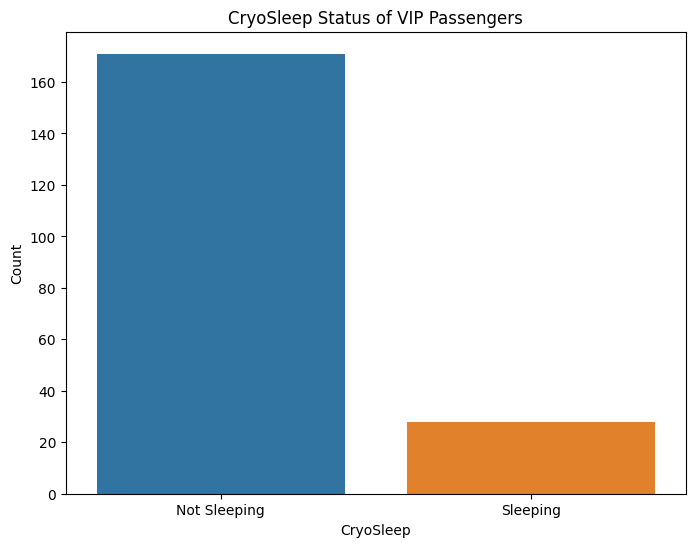

In [85]:
# Create a count plot for 'CryoSleep' among VIP passengers
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', data=train[train['VIP'] == True])
plt.title('CryoSleep Status of VIP Passengers')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Sleeping', 'Sleeping'])
plt.show()

In [86]:
nan_vip_rows = train[train['VIP'].isna()]
print(nan_vip_rows)

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
38       0036_01      Earth      False     F/8/S    55 Cancri e  15.0  NaN   
102      0108_03      Earth       True    G/19/S    TRAPPIST-1e   0.0  NaN   
145      0165_01       Mars       True    F/37/P    TRAPPIST-1e  35.0  NaN   
228      0244_02       Mars       True    F/47/S    55 Cancri e  14.0  NaN   
566      0593_01       Mars      False    D/24/P    TRAPPIST-1e  31.0  NaN   
...          ...        ...        ...       ...            ...   ...  ...   
8494     9074_01      Earth       True  G/1460/S    TRAPPIST-1e   0.0  NaN   
8512     9081_06      Earth      False  F/1858/P  PSO J318.5-22  16.0  NaN   
8542     9122_01      Earth       True  G/1469/S    55 Cancri e  55.0  NaN   
8630     9205_03     Europa       True   B/300/P    TRAPPIST-1e  52.0  NaN   
8666     9248_01     Europa      False  F/1792/S    55 Cancri e  38.0  NaN   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck      

In [87]:
nan_vip_rows = test[test['VIP'].isna()]
print(nan_vip_rows)

     PassengerId HomePlanet  CryoSleep     Cabin  Destination   Age  VIP  \
42       0100_01      Earth      False    G/13/P  TRAPPIST-1e  29.0  NaN   
93       0209_01     Europa      False    B/10/P  TRAPPIST-1e  36.0  NaN   
101      0228_02     Europa      False     B/4/S  55 Cancri e  39.0  NaN   
148      0325_01      Earth      False    G/54/P  TRAPPIST-1e  48.0  NaN   
150      0329_01     Europa       True    B/14/P  55 Cancri e  33.0  NaN   
...          ...        ...        ...       ...          ...   ...  ...   
4077     8875_02     Europa      False   C/330/S  TRAPPIST-1e  32.0  NaN   
4087     8895_01     Europa       True   C/294/P  TRAPPIST-1e  39.0  NaN   
4176     9058_01       Mars      False       NaN  TRAPPIST-1e  38.0  NaN   
4250     9228_01      Earth      False  F/1887/P  TRAPPIST-1e  21.0  NaN   
4267     9260_01      Earth       True  G/1503/P  55 Cancri e   3.0  NaN   

      RoomService  FoodCourt  ShoppingMall      Spa  VRDeck  \
42            0.0       

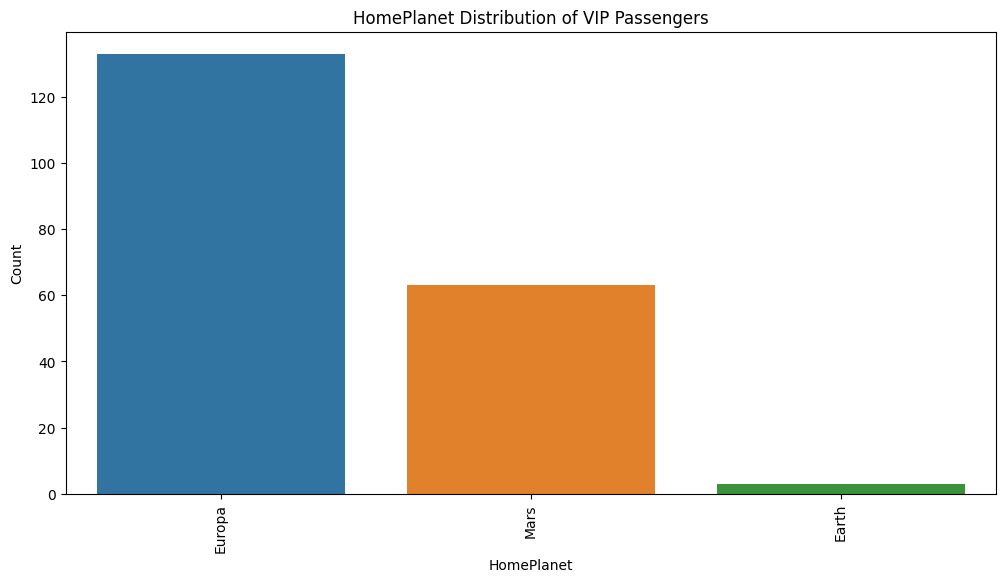

In [88]:
# Filter the DataFrame to get only VIP passengers
vip_passengers = train[train['VIP'] == True]

# Create a countplot for 'HomePlanet' of VIP passengers
plt.figure(figsize=(12, 6))
sns.countplot(x='HomePlanet', data=vip_passengers, order=vip_passengers['HomePlanet'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('HomePlanet Distribution of VIP Passengers')
plt.show()


In [89]:
# Filter the DataFrame to get only VIP passengers
vip_passengers = train[train['VIP'] == True]

# Calculate the mean and median age of VIP passengers
mean_age_vip = vip_passengers['Age'].mean()
median_age_vip = vip_passengers['Age'].median()

print(f"Mean Age of VIP Passengers: {mean_age_vip:.2f}")
print(f"Median Age of VIP Passengers: {median_age_vip:.2f}")

Mean Age of VIP Passengers: 37.42
Median Age of VIP Passengers: 34.00


In [90]:
# Filter the DataFrame to get only VIP passengers
vip_passengers = test[test['VIP'] == True]

# Calculate the mean and median age of VIP passengers
mean_age_vip = vip_passengers['Age'].mean()
median_age_vip = vip_passengers['Age'].median()

print(f"Mean Age of VIP Passengers: {mean_age_vip:.2f}")
print(f"Median Age of VIP Passengers: {median_age_vip:.2f}")

Mean Age of VIP Passengers: 34.46
Median Age of VIP Passengers: 32.00


In [91]:
# Calculate the median age of VIP passengers
median_age_vip = train[train['VIP'] == True]['Age'].median()

# Define conditions for filling NaN in 'VIP'
conditions = (
    (train['Destination'].isin(['TRAPPIST-1e', '55 Cancri e'])) &
    (train['Age'] >= median_age_vip) &
    (train['Leisure_Total'] > 1000)
)

# Fill NaN in 'VIP' based on the conditions for rows with NaN values
train.loc[train['VIP'].isna() & conditions, 'VIP'] = True


In [92]:
# Calculate the median age of VIP passengers
median_age_vip = test[test['VIP'] == True]['Age'].median()

# Define conditions for filling NaN in 'VIP'
conditions = (
    (test['Destination'].isin(['TRAPPIST-1e', '55 Cancri e'])) &
    (test['Age'] >= median_age_vip) &
    (test['Leisure_Total'] > 1000)
)

# Fill NaN in 'VIP' based on the conditions for rows with NaN values
test.loc[test['VIP'].isna() & conditions, 'VIP'] = True

In [93]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             199
Destination         0
Age                 0
VIP               179
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
Leisure_Total       0
dtype: int64

In [94]:
train.VIP.value_counts()

VIP
False    8291
True      223
Name: count, dtype: int64

In [95]:
# Fill remaining NaN values in 'VIP' with False
train['VIP'].fillna(False, inplace=True)

In [96]:
# Fill remaining NaN values in 'VIP' with False
test['VIP'].fillna(False, inplace=True)

In [97]:
train.VIP.value_counts()

VIP
False    8470
True      223
Name: count, dtype: int64

In [98]:
train.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin             199
Destination         0
Age                 0
VIP                 0
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Deck              199
Num               199
Side              199
Group               0
NoOfPassengers      0
Leisure_Total       0
dtype: int64

In [99]:
nan_values_deck = train[train['Deck'].isna()]
nan_values_num = train[train['Num'].isna()]
nan_values_side = train[train['Side'].isna()]

print("NaN values in 'Deck' column:")
print(nan_values_deck)

print("\nNaN values in 'Num' column:")
print(nan_values_num)

print("\nNaN values in 'Side' column:")
print(nan_values_side)


NaN values in 'Deck' column:
     PassengerId HomePlanet  CryoSleep Cabin  Destination   Age    VIP  \
15       0012_01      Earth      False   NaN  TRAPPIST-1e  31.0  False   
93       0101_01       Mars       True   NaN  TRAPPIST-1e  31.0  False   
103      0110_01     Europa      False   NaN  TRAPPIST-1e  32.0  False   
222      0239_01       Mars      False   NaN  TRAPPIST-1e  37.0  False   
227      0244_01       Mars       True   NaN  TRAPPIST-1e  43.0  False   
...          ...        ...        ...   ...          ...   ...    ...   
8209     8772_02     Europa      False   NaN  55 Cancri e  53.0  False   
8475     9057_01     Europa      False   NaN  55 Cancri e  36.0   True   
8485     9069_03     Europa       True   NaN  55 Cancri e  25.0  False   
8509     9081_03      Earth       True   NaN  TRAPPIST-1e   1.0  False   
8656     9233_01      Earth      False   NaN  TRAPPIST-1e  41.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
1

In [100]:
# Calculate mean and median for each amenity
amenity_stats = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].agg(['mean', 'median'])

# Print the mean and median values
print(amenity_stats)

        RoomService   FoodCourt  ShoppingMall         Spa      VRDeck
mean     224.687617  458.077203    173.729169  311.138778  304.854791
median     0.000000    0.000000      0.000000    0.000000    0.000000


In [101]:
# Calculate mean and median for each amenity
amenity_stats = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].agg(['mean', 'median'])

# Print the mean and median values
print(amenity_stats)

        RoomService   FoodCourt  ShoppingMall         Spa      VRDeck
mean     219.266269  439.484296    177.295525  303.052443  310.710031
median     0.000000    0.000000      0.000000    0.000000    0.000000


In [102]:
# Calculate the median and mean for each column
median_values = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median()
mean_values = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

# Iterate through each column and fill NaN values based on 'CryoSleep'
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    conditions = train['CryoSleep'] == True
    train[column].fillna(median_values[column], inplace=True)  # Fill with median if CryoSleep is True
    train[column].fillna(round(mean_values[column]), inplace=True)  # Fill with rounded mean if CryoSleep is False

# Check if there are any remaining NaN values
remaining_nan_values = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()
print(remaining_nan_values)

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [103]:
# Calculate the median and mean for each column
median_values = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median()
mean_values = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()

# Iterate through each column and fill NaN values based on 'CryoSleep'
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    conditions = test['CryoSleep'] == True
    test[column].fillna(median_values[column], inplace=True)  # Fill with median if CryoSleep is True
    test[column].fillna(round(mean_values[column]), inplace=True)  # Fill with rounded mean if CryoSleep is False

# Check if there are any remaining NaN values
remaining_nan_values = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isna().sum()
print(remaining_nan_values)

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [104]:
# Filter rows with NaN cabin numbers
nan_cabin_groups = train[train['Cabin'].isna()]

# Find the number of passengers in each group
nan_cabin_groups = nan_cabin_groups['Group'].value_counts().reset_index()
nan_cabin_groups.columns = ['Group', 'NoOfPassengers']

# Initialize an empty list to store cabin numbers
cabin_numbers = []

# Iterate through each group to find unique cabin numbers
for group in nan_cabin_groups['Group']:
    cabin_numbers_group = train[train['Group'] == group]['Cabin'].unique()
    # Convert cabin numbers to strings and join them
    cabin_numbers.append(', '.join(map(str, cabin_numbers_group)))

# Add the cabin numbers to the DataFrame
nan_cabin_groups['CabinNumbers'] = cabin_numbers

print(nan_cabin_groups)

    Group  NoOfPassengers  CabinNumbers
0    0012               1           nan
1    5105               1           nan
2    5303               1  nan, G/857/P
3    5436               1           nan
4    5474               1           nan
..    ...             ...           ...
194  2497               1           nan
195  2513               1           nan
196  2547               1   nan, A/20/P
197  2559               1           nan
198  9233               1           nan

[199 rows x 3 columns]


In [105]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Num', 'Side', 'Group', 'NoOfPassengers',
       'Leisure_Total'],
      dtype='object')

In [106]:
train.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True) #'Num','NoOfPassengers'

In [107]:
test.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True) #'Num','NoOfPassengers'

In [108]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,NoOfPassengers,Deck,Num,Side,Leisure_Total
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01,G,3,S,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01,F,4,S,2832.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01,C,0,S,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01,C,1,S,7418.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01,F,5,S,645.0


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      4277 non-null   object 
 1   CryoSleep       4277 non-null   bool   
 2   Destination     4277 non-null   object 
 3   Age             4277 non-null   float64
 4   VIP             4277 non-null   bool   
 5   RoomService     4277 non-null   float64
 6   FoodCourt       4277 non-null   float64
 7   ShoppingMall    4277 non-null   float64
 8   Spa             4277 non-null   float64
 9   VRDeck          4277 non-null   float64
 10  Group           4277 non-null   object 
 11  NoOfPassengers  4277 non-null   object 
 12  Deck            4177 non-null   object 
 13  Num             4177 non-null   object 
 14  Side            4177 non-null   object 
 15  Leisure_Total   4277 non-null   float64
dtypes: bool(2), float64(7), object(7)
memory usage: 476.3+ KB


In [110]:
# Identify columns with boolean data type
bool_columns = train.select_dtypes(include=['bool']).columns

# Convert boolean columns to integer (0 for False, 1 for True)
train[bool_columns] = train[bool_columns].astype(int)

In [111]:
# Identify columns with boolean data type
bool_columns = test.select_dtypes(include=['bool']).columns

# Convert boolean columns to integer (0 for False, 1 for True)
test[bool_columns] = test[bool_columns].astype(int)

In [112]:
test.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,NoOfPassengers,Deck,Num,Side,Leisure_Total
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,0013,01,G,3,S,0.0


In [113]:
lab_cat_cols = ['HomePlanet','Destination','Deck','Side','Group']

label_encoder = LabelEncoder()

for i in lab_cat_cols:
    train[i] = label_encoder.fit_transform(train[i].astype(str))

In [114]:
lab_cat_cols = ['HomePlanet','Destination','Deck','Side','Group']

label_encoder = LabelEncoder()

for i in lab_cat_cols:
    test[i] = label_encoder.fit_transform(test[i].astype(str))

In [115]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      4277 non-null   int32  
 1   CryoSleep       4277 non-null   int32  
 2   Destination     4277 non-null   int32  
 3   Age             4277 non-null   float64
 4   VIP             4277 non-null   int32  
 5   RoomService     4277 non-null   float64
 6   FoodCourt       4277 non-null   float64
 7   ShoppingMall    4277 non-null   float64
 8   Spa             4277 non-null   float64
 9   VRDeck          4277 non-null   float64
 10  Group           4277 non-null   int32  
 11  NoOfPassengers  4277 non-null   object 
 12  Deck            4277 non-null   int32  
 13  Num             4177 non-null   object 
 14  Side            4277 non-null   int32  
 15  Leisure_Total   4277 non-null   float64
dtypes: float64(7), int32(7), object(2)
memory usage: 417.8+ KB


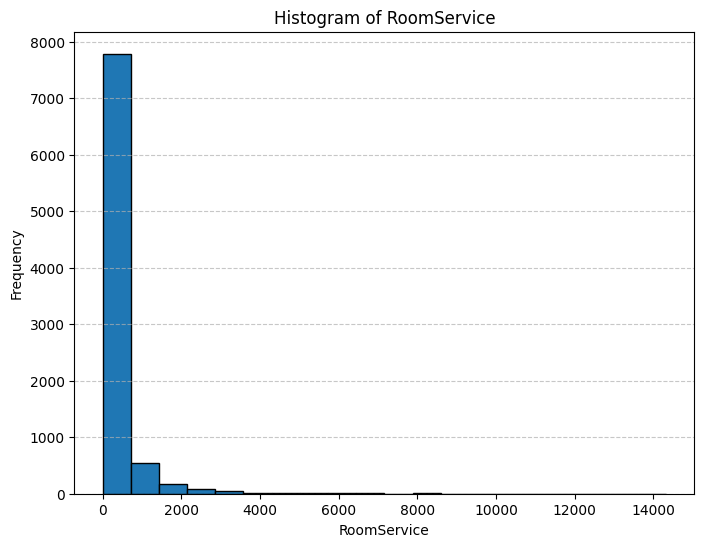

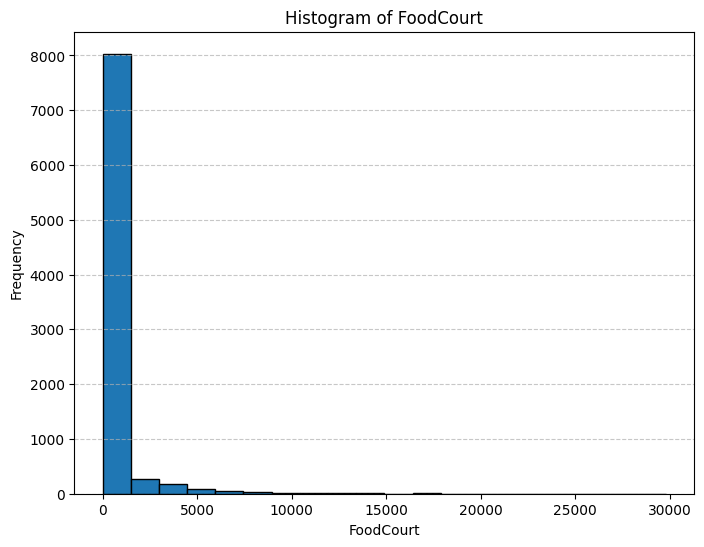

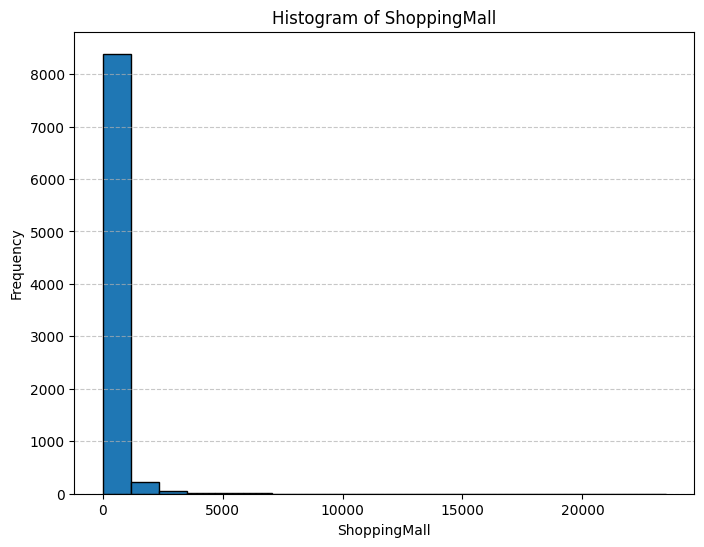

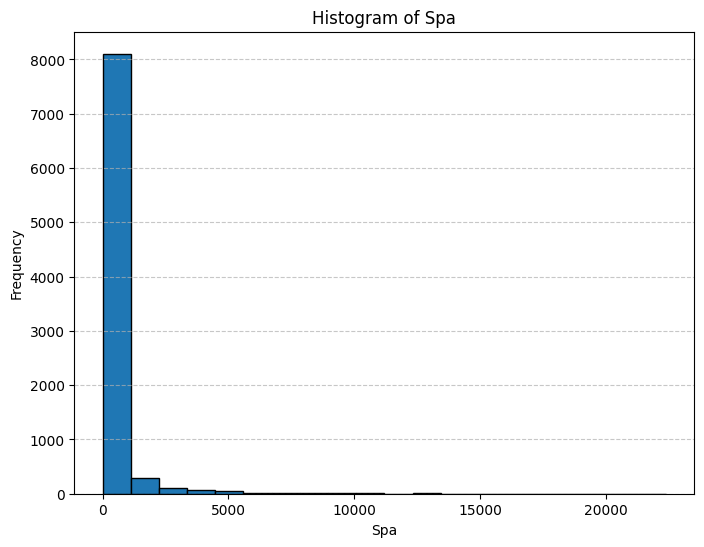

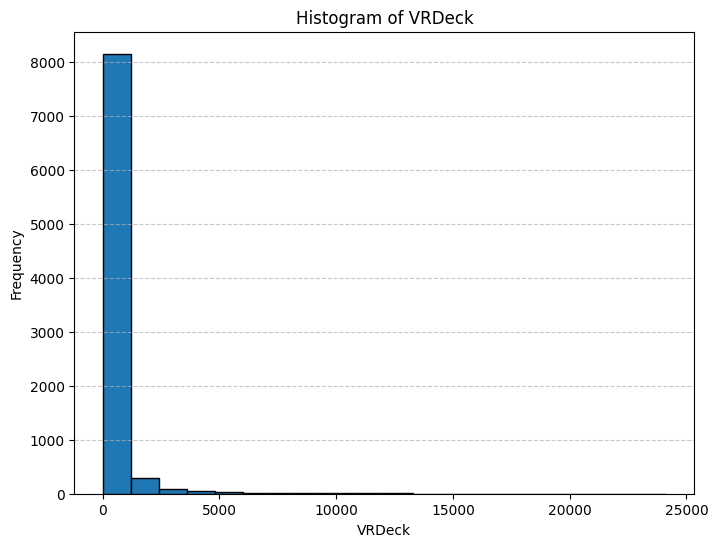

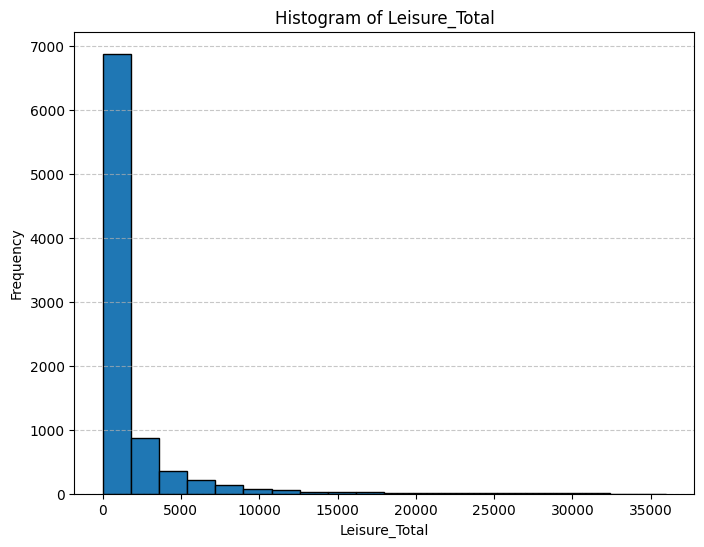

In [116]:
import matplotlib.pyplot as plt

# Specify the column names to visualize
columns_to_visualize = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Leisure_Total"]

# Plot histograms for each specified column
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    plt.hist(train[column], bins=20, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [119]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Group,NoOfPassengers,Leisure_Total
0,1,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,01,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,1,01,736.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,2,01,10383.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,2,02,5176.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,3,01,1091.0


In [120]:
x = train.drop('Transported',axis=1).values
y = train['Transported'].values

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [122]:
# model = CatBoostClassifier()

# model = XGBClassifier()

hyperparameters = {
    'l2_leaf_reg': 1,
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 150
}

model = CatBoostClassifier(
    l2_leaf_reg=hyperparameters['l2_leaf_reg'],
    learning_rate=hyperparameters['learning_rate'],
    max_depth=hyperparameters['max_depth'],
    n_estimators=hyperparameters['n_estimators'])

# model = XGBClassifier(learning_rate=hyperparameters['learning_rate'],
#     max_depth=hyperparameters['max_depth'],
#     n_estimators=hyperparameters['n_estimators'])

# model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)

# model = GradientBoostingClassifier()

# model = RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)

In [123]:
# hyperparameters = {
 
#     'learning_rate': 0.1,
#     'max_depth': 5,
#     'n_estimators': 100
# }

# estimators = []

# model2 = LogisticRegression(solver='lbfgs', random_state=42)
# estimators.append(('LR', model2))

# model3 = RandomForestClassifier(n_estimators=200, random_state=42)
# estimators.append(('RFC', model3))

# model4 = XGBClassifier(
#     learning_rate=hyperparameters['learning_rate'],
#     max_depth=hyperparameters['max_depth'],
#     n_estimators=hyperparameters['n_estimators'])
# estimators.append(('XGBC', model4))

# model5 = CatBoostClassifier(
#     learning_rate=hyperparameters['learning_rate'],
#     max_depth=hyperparameters['max_depth'],
#     n_estimators=hyperparameters['n_estimators'])
# estimators.append(('CBC', model5))

# model6 = GradientBoostingClassifier(
#     n_estimators=100,learning_rate=0.1,max_depth=3)
# estimators.append(('GBC', model6))

# model = VotingClassifier(estimators)

In [124]:
model.fit(x_train,y_train)

0:	learn: 0.6603594	total: 161ms	remaining: 24s
1:	learn: 0.6336511	total: 165ms	remaining: 12.2s
2:	learn: 0.6079293	total: 168ms	remaining: 8.23s
3:	learn: 0.5870747	total: 171ms	remaining: 6.24s
4:	learn: 0.5696789	total: 174ms	remaining: 5.04s
5:	learn: 0.5545516	total: 177ms	remaining: 4.25s
6:	learn: 0.5412923	total: 180ms	remaining: 3.67s
7:	learn: 0.5288168	total: 183ms	remaining: 3.25s
8:	learn: 0.5182498	total: 186ms	remaining: 2.91s
9:	learn: 0.5090118	total: 189ms	remaining: 2.64s
10:	learn: 0.5011748	total: 192ms	remaining: 2.42s
11:	learn: 0.4943853	total: 195ms	remaining: 2.24s
12:	learn: 0.4870541	total: 198ms	remaining: 2.09s
13:	learn: 0.4819241	total: 201ms	remaining: 1.96s
14:	learn: 0.4761065	total: 205ms	remaining: 1.84s
15:	learn: 0.4714255	total: 208ms	remaining: 1.74s
16:	learn: 0.4657326	total: 211ms	remaining: 1.65s
17:	learn: 0.4612713	total: 214ms	remaining: 1.57s
18:	learn: 0.4568467	total: 218ms	remaining: 1.5s
19:	learn: 0.4529785	total: 221ms	remaining:

In [125]:
model.score(x_train,y_train)

0.8537532355478861

In [126]:
model.score(x_test,y_test)

0.8033352501437608